In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/katleyq/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


*The New York Spill Incidients dataset is provided by the New York State Department of Environmental Conservation. It contains data related to hazardous material spills in New York. It includes information of who caused the spill, when it happened, and other important information. This dataset was accessed on November 5th.
The TIGER Shapefile is provided by the United States Census Bureau. It contains U.S. county boundaries. This data was accessed on November 5th.*

## 3. Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# Set PROJ_LIB variable to be central PROJ library
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [2]:
# Contstruct file paths to data for spills and counties
spill_fp = os.path.join('data',  'Spill_Incidents_20241105.csv')
counties_fp = os.path.join('data', 'tl_2023_us_county', 'tl_2023_us_county.shp')

# Read in spills CSV file using file path above
spills = pd.read_csv(spill_fp)

# Read in counties geodataframe using file path above
counties = gpd.read_file(counties_fp)

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [3]:
# a. Check the head of the spill's data frame
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
# b. Check the data types of each column in the spills dataset
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [4]:
# c. Check the unique values within the Material Family column of the spills df
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [5]:
# d. Check the unique values in the County column of the spills df
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

The first thing that stuck out to me was that there are capital letters and spaces within the column names when I inspected it with head(). That signaled that I should clean up the names to make it easier to work with. When I looked at the data types of the columns, I noticed that some columns like spill date were not in a data type that I expected. Spill date should have been a datetime. When I looked at the unique values of Material Family, I noticed there are other categories besides petroleum spills. When I inspected the unique values of the County column, I noticed that there are other states included in the NY spills dataset, which was confusing to me.

<!-- END QUESTION -->

*Your answer here.*

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [3]:
# a. Convert the column names to lowercase and replace any space with an underscore
spills.columns = spills.columns.str.lower()
spills.columns = spills.columns.str.replace(" ", "_")

spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

In [4]:
# b. Convert the spill date column to a datetime 
spills.spill_date = pd.to_datetime(spills.spill_date)

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [5]:
# a. Filter spills dataset for spills from Jan 1 2023 to Oct 31 2023 including those dates
petr_23 = spills[(spills.spill_date >= '2023-01-01') & (spills.spill_date <= '2023-10-31')]

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [6]:
# b. Print unique values of the years within the petr_23 df
print(f"What years are in petr_23? : {pd.unique(petr_23['spill_date'].dt.year)}")

# Print unique values of the months within the petr_23 df
print(f"What months are in petr_23? : {sorted(set(pd.unique(petr_23['spill_date'].dt.month)))}")

What years are in petr_23? : [2023]
What months are in petr_23? : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [14]:
# c. Filter petr_23 for observations where material family is petroleum
petr_23 = petr_23[petr_23['material_family'] == "Petroleum"]

# Verify that Petroleum is the only value under material_family (returns false since there are other categories)
assert (petr_23.material_family == "Petroleum").all(), "Not all values are Petroleum"

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [15]:
# Filter the dataframe for petroleum spills, select for the county column, 
# count up all observations where county is the same, convert to dataframe,
# rename the county column to n_spills, then reset index so that it starts at 0
spills_per_county = (petr_23[petr_23['material_family'] == "Petroleum"]
                    .loc[:, ['county']]
                    .value_counts()
                    .to_frame()
                    .rename(columns = {"count" : "n_spills"})
                    .reset_index())

spills_per_county

,county,n_spills
0,Westchester,743
1,Suffolk,723
2,Nassau,576
3,Orange,336
4,Queens,321
...,...,...
59,Schuyler,11
60,Hamilton,11
61,New Jersey - Region 2,6
62,Yates,6


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [11]:
# a. Check the head of the counties gdf
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [12]:
# b. Check the data type of each column in the counties gdf
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [13]:
# c. Check the CRS of the counties gdf
counties.crs

<Geographic 2D CRS: GEOGCS["GCS_North_American_1983",DATUM["D_North_Am ...>
Name: NAD83
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

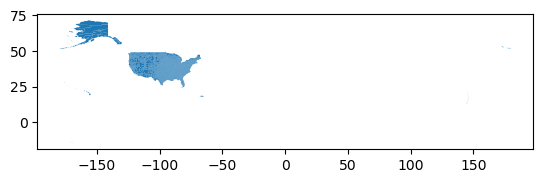

In [14]:
# d. Plot the counties gdf
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

After inspecting the head of the dataframe, it looks like the column names are all captilized. The data types of each column are what I expected them to be. Specifically, the geometry column is a geometry column. The CRS is in NAD 83, which would be import to note if we were joining another polygon layer. Plotting them indicated that we have mainland counties as well as Alaska, Hawaii, and other land outside of the mainland.

*Your answer here.*

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [16]:
# Convert column names to lowercase
counties.columns = counties.columns.str.lower()

counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

Text(0.5, 1.0, 'New York County Boundaries')

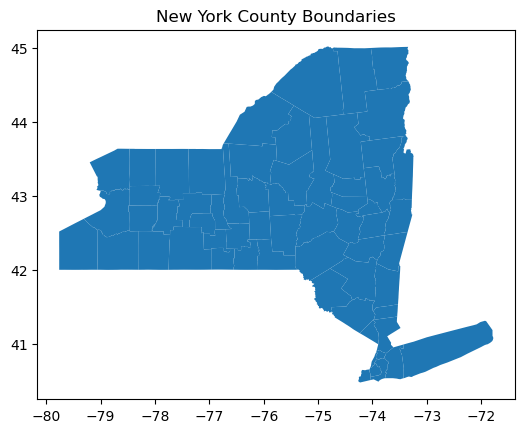

In [17]:
# Subset counties gdf for where statefp is 36. According to documentation, 36 is the state code for New York
ny_counties = counties[counties.statefp == '36']

# Plot the NY counties and add title
ny_counties.plot().set_title("New York County Boundaries")

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [18]:
# a. Sort the unique values in name column of ny_counties by alphabetical order then convert to numpy
# array for readability 
ny_counties_unique = np.array(sorted(ny_counties.name.unique()))
ny_counties_unique

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'Niagara', 'Oneida', 'Onondaga', 'Ontario',
       'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam', 'Queens',
       'Rensselaer', 'Richmond', 'Rockland', 'Saratoga', 'Schenectady',
       'Schoharie', 'Schuyler', 'Seneca', 'St. Lawrence', 'Steuben',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype='<U12')

In [19]:
# b.Sort the unique values in county column of spills_per_county by alphabetical order then convert to numpy
# array for readability 
spills_per_county_unique = np.array(sorted(spills_per_county.county.unique()))
spills_per_county_unique

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype='<U28')



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [20]:
# Find values that are in spills_per_county but do not appear in ny_counties
# Conver to list
diff_names_spills = np.setdiff1d(spills_per_county_unique, ny_counties_unique).tolist()
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [21]:
# Find values that are in ny_counties but do not appear in spills_per_county
# Conver to list
diff_names_ny = np.setdiff1d(ny_counties_unique, spills_per_county_unique).tolist()
diff_names_ny

['St. Lawrence']




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [22]:
# e. Filter spills_per_county data frame to where the county of the observation is Tuscarora Indian Reservations
spills_per_county.loc[spills_per_county.county == 'Tuscarora Indian Reservation']

,county,n_spills
63,Tuscarora Indian Reservation,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [23]:
# Replace any cell in spills_per_county where the value is St Lawrence then change it to St. Lawrence
spills_per_county.county = spills_per_county.county.replace('St Lawrence', 'St. Lawrence')

# Verify that there is a St Lawrence is not a value in county column of spills_per_county
assert 'St Lawrence' not in spills_per_county.county

# Print a message that signfies that the update is successful
print("Update to St. Lawrence was successful")

Update to St. Lawrence was successful


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [24]:
# a. Rename the 'county' column to 'name' so that it matches the ny_county gdf
spills_per_county = spills_per_county.rename(columns = {'county' : 'name'})
spills_per_county


,name,n_spills
0,Westchester,743
1,Suffolk,723
2,Nassau,576
3,Orange,336
4,Queens,321
...,...,...
59,Schuyler,11
60,Hamilton,11
61,New Jersey - Region 2,6
62,Yates,6


In [25]:
# b. Merge the spills_per_county and ny_counties dataframes on the 'name' column so that only observations in both dataframes are kept
ny_counties = pd.merge(spills_per_county,
                  ny_counties,
                  how = 'inner',
                  on = 'name')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [26]:
# c. Filter for observation where name == "Niagara" then add a count to the n_spills column
ny_counties.loc[ny_counties.name == 'Niagara', 'n_spills'] += 1

# Verify that Niagara county has a value greater than 88 which was the original value
assert ny_counties.loc[ny_counties.name == 'Niagara', 'n_spills'].item() > 88

# Print a message that the update was successful
print("ny_counties was updated. 1 spill was added to Niagara falls for Tuscarora Indian Reservation")

ny_counties was updated. 1 spill was added to Niagara falls for Tuscarora Indian Reservation


<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



In [27]:
# Convert ny_counties to a geodataframe with crs = EPSG:4326
gdf = gpd.GeoDataFrame(
    ny_counties, geometry='geometry', crs="EPSG:4326"
)

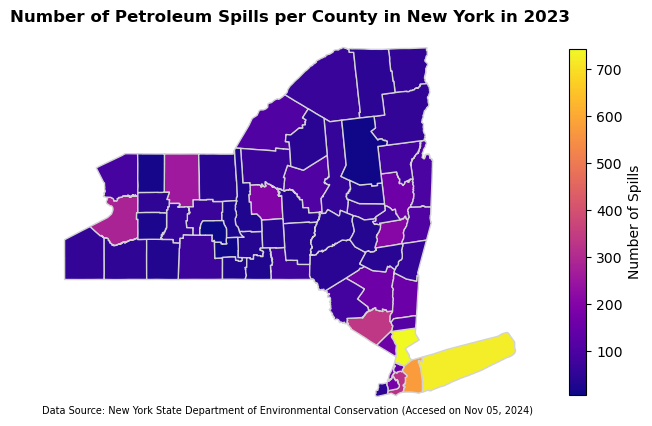

In [30]:
# a. Initialize figure with appropriate figure dimensions
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Create choropleth map of number of spills per NY county
# Plot with refined color and edge style
gdf.plot(
    ax=ax,
    column='n_spills',
    cmap='plasma',
    edgecolor = "lightgrey",
    legend=True,
    legend_kwds={'shrink': 0.75, 'label': "Number of Spills"}
)

# Add title
ax.set_title('Number of Petroleum Spills per County in New York in 2023', fontsize=12, weight='bold')

# Annoate with data source
ax.annotate('Data Source: New York State Department of Environmental Conservation (Accesed on Nov 05, 2024)',
            xy=(0, 0),
            xytext =(0,0),
            xycoords='axes fraction',
            fontsize=7)

# Show figure
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

In [115]:
gdf.sort_values('n_spills', ascending = False).head(3)[['name', 'n_spills']]

,name,n_spills
0,Westchester,743
1,Suffolk,723
2,Nassau,576


**Figure description**: The chloropleth map displays the number of petroleum spills within each county in New York from January 1, 2023 to October 31, 2023. The counties that are dark purple have less petroleum spills than the counties that have a warmer color. The top 3 counties with the highest number of petroleum spills are Westchester, Suffolk, and Nassau counties. This data was provided by the New York State Department of Environmental Conservation (accessed on November 5, 2024). 